# Proyecto final

## Introduccion

La idea del analisis de este dataset es realizar hipotesis y preguntas sobre los datos y encotrar insights al analizar las distintas features de los jugadores.

Ademas se pretende generar modelos que predigan precios de jugadores y posibles jugadores estrella.

El dataset contiene informacion sobre los jugadores de las 5 grandes ligas de europa, desde la temporada 2017-2018 hasta 2019-2020. Contiene informacion sobre las estadisticas de los jugadores en la temporada como posicion, pases, goles, faltas, tarjetas y MUCHO mas. Tambien contiene caracteristicas fisicas como peso, altura, pais de origen, etc. Y por ultimo, tambien contiene el valor de mercado en ese momento

[Link del dataset en kaggle](https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics)

La idea en un inicio es trabajar solo con este dataset, pero es posible que puedan agregarse mas dataset para el analisis

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# personalizacion de seaborn
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3)

In [146]:
df_1718 = pd.read_csv('./transfermarkt_fbref_201718.csv', delimiter=';', index_col=0, low_memory=False)
df_1819 = pd.read_csv('./transfermarkt_fbref_201819.csv', delimiter=';', index_col=0, low_memory=False)
df_1920 = pd.read_csv('./transfermarkt_fbref_201920.csv', delimiter=';', index_col=0, low_memory=False)

In [147]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [148]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [149]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

## Descripcion de cada una de las columnas del dataset

A medida que el proyecto avance y sea necesario se agregara la descripcion de las columnas restantes

In [150]:
list(df.columns)

['player',
 'nationality',
 'position',
 'squad',
 'age',
 'birth_year',
 'value',
 'height',
 'position2',
 'foot',
 'league',
 'games',
 'games_starts',
 'minutes',
 'goals',
 'assists',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xa',
 'xg_per90',
 'xa_per90',
 'xg_xa_per90',
 'npxg_per90',
 'npxg_xa_per90',
 'minutes_90s',
 'shots_total',
 'shots_on_target',
 'shots_free_kicks',
 'shots_on_target_pct',
 'shots_total_per90',
 'shots_on_target_per90',
 'goals_per_shot',
 'goals_per_shot_on_target',
 'npxg_per_shot',
 'xg_net',
 'npxg_net',
 'passes_completed',
 'passes',
 'passes_pct',
 'passes_total_distance',
 'passes_progressive_distance',
 'passes_completed_short',
 'passes_short',
 'passes_pct_short',
 'passes_completed_medium',
 'passes_medium',
 'passes_pct_medium',
 'passes_completed_long',
 'passes_long',
 'passes_pct_long',
 'xa_net',
 

* 'player': nombre del jugador.
* 'nationality': nacionalidad del jugador.
* 'position': posición en el campo de juego del jugador.
* 'squad': equipo al que pertenece el jugador.
* 'age': edad del jugador.
* 'birth_year': año de nacimiento del jugador.
* 'value': valor del jugador en el mercado de transferencias.
* 'height': altura del jugador.
* 'position2': posición secundaria del jugador.
* 'foot': pie dominante del jugador.
* 'league': liga en la que participa el equipo del jugador.
* 'games': cantidad de partidos jugados.
* 'games_starts': cantidad de partidos en los que fue titular.
* 'minutes': cantidad de minutos jugados.
* 'goals': cantidad de goles anotados.
* 'assists': cantidad de asistencias realizadas.
* 'pens_made': cantidad de penales convertidos.
* 'pens_att': cantidad de penales pateados.
* 'cards_yellow': cantidad de tarjetas amarillas recibidas.
* 'cards_red': cantidad de tarjetas rojas recibidas.
* 'goals_per90': cantidad de goles por cada 90 minutos jugados.
* 'assists_per90': cantidad de asistencias por cada 90 minutos jugados.
* 'goals_assists_per90': cantidad de goles y asistencias por cada 90 minutos jugados.
* 'goals_pens_per90': cantidad de goles de penal por cada 90 minutos jugados.
* 'goals_assists_pens_per90': cantidad de goles, asistencias y penales convertidos por cada 90 minutos jugados.
* 'xg' (Expected Goals) representa la probabilidad de que un tiro en particular termine en gol. Es una medida cuantitativa de la calidad de las oportunidades de gol que un equipo o jugador crea en un partido.
* 'npxg' (Non-Penalty Expected Goals) es similar a 'xg', pero excluye los goles de penal.
* 'xa' (Expected Assists) mide la probabilidad de que un pase se convierta en una asistencia. Es una medida cuantitativa de la calidad de los pases que un jugador realiza.
* 'xg_per90', 'xa_per90', y 'xg_xa_per90' son las versiones per 90 minutos de 'xg', 'xa', y la suma de ambos, respectivamente. Esto permite una comparación más justa entre jugadores que han jugado diferentes cantidades de minutos.
* 'npxg_per90' es la versión per 90 minutos de 'npxg'.
* 'npxg_xa_per90' es la suma per 90 minutos de 'npxg_per90' y 'xa_per90'.
* 'minutes_90s' es el número de 90 minutos jugados por un jugador en un partido o por un equipo en una temporada.
* 'shots_total' es el número total de tiros realizados por un jugador o equipo en un partido o temporada.
* 'shots_on_target' es el número de tiros que van directamente a portería.
* 'shots_free_kicks' es el número de tiros libres directos intentados.
* 'shots_on_target_pct' es el porcentaje de tiros totales que van directamente a portería.
* 'shots_total_per90' y 'shots_on_target_per90' son las versiones per 90 minutos de 'shots_total' y 'shots_on_target', respectivamente.
* 'goals_per_shot' es el número promedio de goles por tiro realizado.
* 'goals_per_shot_on_target' es el número promedio de goles por tiro directo a portería.
* 'npxg_per_shot' es la cantidad promedio de 'npxg' por tiro realizado.
* 'xg_net': Esta columna indica la diferencia entre los goles anotados por un jugador o equipo y el número esperado de goles (xG) que deberían haber anotado según las oportunidades de gol que tuvieron durante los partidos. Una xG net positiva significa que el jugador o equipo está siendo más efectivo de lo esperado en la finalización, mientras que una xG net negativa significa lo contrario.
* 'npxg_net': Similar a 'xg_net', esta columna indica la diferencia entre los goles anotados y el número esperado de goles que no fueron penales (npxG) que deberían haber anotado según las oportunidades de gol que tuvieron durante los partidos. Al excluir los penales, se espera que la métrica sea más representativa de la habilidad de finalización de un jugador o equipo. Una npxG net positiva significa que el jugador o equipo está siendo más efectivo de lo esperado en la finalización sin penales, mientras que una npxG net negativa significa lo contrario.
* 'passes_completedm': número total de pases completados por el jugador en la temporada.
* 'passesm': número total de pases intentados por el jugador en la temporada.
* 'passes_pctm': porcentaje de éxito en los pases del jugador en la temporada.
* 'passes_total_distancem': distancia total recorrida por los pases del jugador en la temporada.
* 'passes_progressive_distancem': distancia total recorrida por los pases del jugador que avanzaron hacia el campo contrario en la temporada.
* 'passes_completed_shortm': número total de pases cortos completados por el jugador en la temporada.
* 'passes_shortm': número total de pases cortos intentados por el jugador en la temporada.
* 'passes_pct_shortm': porcentaje de éxito en los pases cortos del jugador en la temporada.
* 'passes_completed_mediumm': número total de pases medios completados por el jugador en la temporada.
* 'passes_mediumm': número total de pases medios intentados por el jugador en la temporada.
* 'passes_pct_mediumm': porcentaje de éxito en los pases medios del jugador en la temporada.
* 'passes_completed_longm': número total de pases largos completados por el jugador en la temporada.
* 'passes_longm': número total de pases largos intentados por el jugador en la temporada.
* 'passes_pct_longm': porcentaje de éxito en los pases largos del jugador en la temporada.
* 'xa_netm': valor esperado de asistencias netas del jugador en la temporada.
* 'assisted_shotsm': número total de tiros asistidos por el jugador en la temporada.
* 'passes_into_final_thirdm': número total de pases realizados por el jugador que llegaron al tercio final del campo en la temporada.
* 'passes_into_penalty_aream': número total de pases realizados por el jugador que llegaron al área de penalti en la temporada.
* 'crosses_into_penalty_aream': número total de centros realizados por el jugador al área de penalti en la temporada.
* 'progressive_passesm': número total de pases realizados por el jugador que avanzaron hacia el campo contrario en la temporada.
* 'passes_livem': número total de pases realizados por el jugador en jugadas en vivo (no en tiros libres, saques de banda, etc.) en la temporada.
* 'passes_deadm': número total de pases realizados por el jugador en jugadas muertas (tiros libres, saques de banda, etc.) en la temporada.
* 'passes_free_kicksm': número total de pases realizados por el jugador en tiros libres en la temporada.
* 'through_ballsm': número total de pases realizados por el jugador que superaron la línea defensiva contraria en la temporada.
* 'passes_pressurem': número total de pases realizados por el jugador bajo presión en la temporada.
* 'passes_switchesm': número total de cambios de juego realizados por el jugador en la temporada.
* 'crossesm': número total de centros realizados por el jugador en la temporada.
* 'corner_kicksm': número total de saques de esquina realizados por el jugador en la temporada.
* 'corner_kicks_inm': número total de saques de esquina del jugador que llegaron a su destino en la temporada.
* 'corner_kicks_straightm': Cantidad de tiros de esquina sin efecto curvo realizados con el pie por un jugador durante una temporada.
* 'passes_groundm': Cantidad de pases realizados por un jugador que se mantienen a nivel del suelo durante una temporada.
* 'passes_lowm': Cantidad de pases realizados por un jugador que se mantienen a baja altura durante una temporada.
* 'passes_highm': Cantidad de pases realizados por un jugador que se mantienen a alta altura durante una temporada.
* 'passes_left_footm': Cantidad de pases realizados por un jugador con el pie izquierdo durante una temporada.
* 'passes_right_footm': Cantidad de pases realizados por un jugador con el pie derecho durante una temporada.
* 'passes_headm': Cantidad de pases realizados por un jugador con la cabeza durante una temporada.
* 'throw_insm': Cantidad de tiros libres realizados por un jugador durante una temporada.
* 'passes_other_bodym': Cantidad de pases realizados por un jugador con partes distintas al pie o la cabeza durante una temporada.
* 'passes_offsidesm': Cantidad de pases realizados por un jugador que resultan en una situación de fuera de juego durante una temporada.
* 'passes_oobm': Cantidad de pases realizados por un jugador que salen del campo de juego durante una temporada.
* 'passes_interceptedm': Cantidad de pases realizados por un jugador que son interceptados por un oponente durante una temporada.
* 'passes_blockedm': Cantidad de pases realizados por un jugador que son bloqueados por un oponente durante una temporada.
* 'scam': Es el número total de acciones de ataque en las que un jugador participa, incluyendo los pases clave, los tiros, los regates y las faltas recibidas.
* 'sca_per90m': Es el número de acciones de ataque en las que un jugador participa por cada 90 minutos jugados.
* 'sca_passes_livem': Es el número total de acciones de ataque en las que un jugador participa mediante pases en movimiento (es decir, pases que no son de esquina, tiros libres o saques de banda).
* 'sca_passes_deadm': Es el número total de acciones de ataque en las que un jugador participa mediante pases de balón muerto (es decir, pases que son de esquina, tiros libres o saques de banda).
* 'sca_dribblesm': Es el número total de acciones de ataque en las que un jugador participa mediante regates.
* 'sca_shotsm': Es el número total de acciones de ataque en las que un jugador participa mediante tiros al arco.
* 'sca_fouledm': Es el número total de acciones de ataque en las que un jugador participa mediante faltas recibidas.
* 'gcam': Es el número total de acciones de ataque en las que un jugador participa y que resultan en un gol.
* 'gca_per90m': Es el número de acciones de ataque en las que un jugador participa y que resultan en un gol por cada 90 minutos jugados.
* 'gca_passes_livem': Es el número total de acciones de ataque en las que un jugador participa mediante pases en movimiento y que resultan en un gol.
* 'gca_passes_deadm': Es el número total de acciones de ataque en las que un jugador participa mediante pases de balón muerto y que resultan en un gol.
* 'gca_dribblesm': Es el número total de acciones de ataque en las que un jugador participa mediante regates y que resultan en un gol.
* 'gca_shotsm': Es el número total de acciones de ataque en las que un jugador participa mediante tiros al arco y que resultan en un gol.
* 'gca_fouledm': Es el número total de acciones de ataque en las que un jugador participa mediante faltas recibidas y que resultan en un gol.
* 'gca_og_form': Es el número total de acciones de ataque en las que un jugador participa y que resultan en un gol en propia meta del equipo contrario.
* 'tacklesm': Es el número total de entradas realizadas por un jugador en un intento de recuperar el balón del equipo contrario.
* 'tackles_wonm': Es el número total de entradas realizadas por un jugador en las que el balón es recuperado con éxito por su equipo.
* 'tackles_def_3rdm': Es el número total de entradas realizadas por un jugador en la tercera parte defensiva del campo (más cercana a su propia portería) en un intento de recuperar el balón del equipo contrario.
* 'tackles_mid_3rdm': Es el número total de entradas realizadas por un jugador en la tercera parte media del campo en un intento de recuperar el balón del equipo contrario.
* 'tackles_att_3rdm': número de tackles exitosos realizados por un jugador en el tercio ofensivo del campo.
* 'dribble_tacklesm': Número total de veces que el jugador ha ganado un tackle en una situación de dribbling por parte del oponente.
* 'dribbles_vsm': Número total de veces que el jugador ha intentado dribblar a un oponente.
* 'dribble_tackles_pctm': Porcentaje de éxito en los tackles durante situaciones de dribbling por parte del oponente.
* 'dribbled_pastm': Número total de veces que el jugador ha sido superado en un intento de dribbling por parte de un oponente.
* 'pressuresm': Número total de veces que el jugador ha realizado una presión sobre un oponente con el objetivo de interrumpir su posesión del balón.
* 'pressure_regainsm': Número total de veces que el jugador ha recuperado el balón después de realizar una presión exitosa sobre un oponente.
* 'pressure_regain_pctm': Porcentaje de éxito en las recuperaciones de balón después de realizar una presión sobre un oponente.
* 'pressures_def_3rdm': Número total de veces que el jugador ha realizado una presión en el tercio defensivo del campo.
* 'pressures_mid_3rdm': Número total de veces que el jugador ha realizado una presión en el tercio medio del campo.
* 'pressures_att_3rdm': Número total de veces que el jugador ha realizado una presión en el tercio ofensivo del campo.
* 'blocksm': Número total de veces que el jugador ha bloqueado un tiro o un pase.
* 'blocked_shotsm': Número total de tiros bloqueados por el jugador.
* 'blocked_shots_savesm': Número total de tiros bloqueados que se convirtieron en salvadas por el portero.
* 'blocked_passesm': Número total de pases bloqueados por el jugador.
* 'interceptionsm': Número total de intercepciones realizadas por el jugador.
* 'clearancesm': Número total de veces que el jugador ha despejado el balón fuera de la zona defensiva de su equipo.
* 'errorsm': Número total de errores cometidos por el jugador que llevaron a una oportunidad de gol para el equipo contrario.
* 'touchesm': Número total de veces que el jugador ha tocado el balón durante el partido.
* 'touches_def_pen_aream': Número de veces que el jugador tocó el balón en el área penal defensiva del equipo contrario.
* 'touches_def_3rdm': Número de veces que el jugador tocó el balón en el tercio defensivo del equipo contrario.
* 'touches_mid_3rdm': Número de veces que el jugador tocó el balón en el tercio medio del campo.
* 'touches_att_3rdm': Número de veces que el jugador tocó el balón en el tercio ofensivo del equipo contrario.
* 'touches_att_pen_aream': Número de veces que el jugador tocó el balón en el área penal del equipo contrario.
* 'touches_live_ballm': Número de veces que el jugador tocó el balón mientras este estaba en juego.
* 'dribbles_completedm': Número de intentos de regate completados con éxito.
* 'dribblesm': Número total de intentos de regate.
* 'dribbles_completed_pctm': Porcentaje de intentos de regate completados con éxito.
* 'players_dribbled_pastm': Número de jugadores del equipo contrario que fueron superados por el jugador en un intento de regate.
* 'nutmegsm': Número de veces que el jugador pasó el balón entre las piernas de un jugador del equipo contrario.
* 'carriesm': Número de veces que el jugador avanzó con el balón controlado.
* 'carry_distancem': Distancia total recorrida con el balón controlado.
* 'carry_progressive_distancem': Distancia total recorrida con el balón controlado, avanzando hacia la portería contraria.
* 'pass_targetsm': Número de veces que el jugador fue objetivo de un pase.
* 'passes_receivedm': Número de pases recibidos por el jugador.
* 'passes_received_pctm': Porcentaje de pases recibidos con éxito.
* 'miscontrolsm': Número de veces que el jugador no controló correctamente el balón.
* 'dispossessedm': Número de veces que el jugador perdió el balón después de ser despojado de él por un jugador del equipo contrario.
* 'cards_yellow_redm': Número de tarjetas amarillas y rojas recibidas por el jugador en el transcurso de la temporada.
* 'foulsm': La cantidad de faltas cometidas por el jugador.
* 'fouledm': La cantidad de faltas recibidas por el jugador.
* 'offsidesm': La cantidad de veces que el jugador fue sancionado por posición adelantada.
* 'pens_wonm': La cantidad de penales que el jugador ganó para su equipo.
* 'pens_concededm': La cantidad de penales que el jugador cometió y fueron sancionados en contra de su equipo.
* 'own_goalsm': La cantidad de goles en propia puerta anotados por el jugador.
* 'ball_recoveriesm': La cantidad de veces que el jugador recuperó la posesión del balón.
* 'aerials_wonm': La cantidad de duelos aéreos que el jugador ganó.
* 'aerials_lostm': La cantidad de duelos aéreos que el jugador perdió.
* 'aerials_won_pctm': El porcentaje de duelos aéreos ganados por el jugador.
* 'games_gkm': La cantidad de partidos en los que el jugador actuó como arquero.
* 'games_starts_gkm': La cantidad de partidos en los que el jugador actuó como titular arquero.
* 'minutes_gkm': La cantidad de minutos que el jugador actuó como arquero.
* 'goals_against_gkm': La cantidad de goles que recibió el equipo del jugador mientras estuvo en el arco.
* 'goals_against_per90_gkm': La cantidad de goles que recibe el equipo del jugador por cada 90 minutos que estuvo en el arco.
* 'shots_on_target_againstm': La cantidad de tiros al arco que recibió el equipo del jugador.
* 'savesm': La cantidad de tiros al arco que el jugador atajó.
* 'save_pctm': El porcentaje de tiros al arco que el jugador atajó.
* 'wins_gkm': La cantidad de partidos ganados por el equipo del jugador mientras actuó como arquero.
* 'draws_gkm': Número de empates en los que el portero participó.
* 'losses_gkm': Número de derrotas en las que el portero participó.
* 'clean_sheetsm': Número de partidos en los que el portero mantuvo su portería a cero (sin recibir goles).
* 'clean_sheets_pctm': Porcentaje de partidos en los que el portero mantuvo su portería a cero.
* 'pens_att_gkm': Número de penales que enfrentó el portero.
* 'pens_allowedm': Número de goles en contra recibidos por penales.
* 'pens_savedm': Número de penales detenidos por el portero.
* 'pens_missed_gkm': Número de penales fallados por los oponentes del portero.
* 'minutes_90s_gkm': Número de minutos jugados por el portero, expresado en términos de partidos completos de 90 minutos.
* 'free_kick_goals_against_gkm': Número de goles en contra recibidos por tiros libres directos.
* 'corner_kick_goals_against_gkm': Número de goles en contra recibidos por tiros de esquina.
* 'own_goals_against_gkm': Número de goles en contra anotados por el propio equipo del portero.
* 'psxg_gkm': xG esperado de los tiros a puerta enfrentados por el portero.
* 'psnpxg_per_shot_on_target_againstm': NPxG (expected goals sin penales) por tiro a puerta enfrentado por el portero.
* 'psxg_net_gkm': Diferencia entre los goles permitidos y el xG esperado enfrentado por el portero.
* 'psxg_net_per90_gkm': Diferencia entre los goles permitidos y el xG esperado enfrentado por el portero, expresado en términos de partidos completos de 90 minutos.
* 'passes_completed_launched_gkm': Número de pases lanzados completados por el portero.
* 'passes_launched_gkm': Número de pases lanzados por el portero.
* 'passes_pct_launched_gkm': Porcentaje de éxito de los pases lanzados por el portero.
* 'passes_gkm': Número de pases realizados por partido por el arquero.
* 'passes_throws_gkm': Número de pases realizados con los manos por partido por el arquero.
* 'pct_passes_launched_gkm': Porcentaje de pases lanzados por partido por el arquero.
* 'passes_length_avg_gkm': Promedio de distancia de los pases realizados por partido por el arquero.
* 'goal_kicksm': Número de saques de arco por partido por el arquero.
* 'pct_goal_kicks_launchedm': Porcentaje de saques de arco lanzados por partido por el arquero.
* 'goal_kick_length_avgm': Promedio de distancia de los saques de arco realizados por partido por el arquero.
* 'crosses_gkm': Número de centros al área realizados por partido por el arquero.
* 'crosses_stopped_gkm': Número de centros al área detenidos por partido por el arquero.
* 'crosses_stopped_pct_gkm': Porcentaje de centros al área detenidos por partido por el arquero.
* 'def_actions_outside_pen_area_gkm': Número de acciones defensivas realizadas fuera del área chica por partido por el arquero.
* 'def_actions_outside_pen_area_per90_gkm': Número de acciones defensivas realizadas fuera del área chica por cada 90 minutos jugados por el arquero.
* 'avg_distance_def_actions_gkm': Promedio de la distancia de las acciones defensivas realizadas por partido por el arquero.
* 'LgRk': Clasificación del equipo en la liga.
* 'MP': Partidos jugados por el arquero.
* 'W': Número de victorias del equipo con el arquero en el campo.
* 'D': El número de partidos empatados por el equipo en la temporada
* 'L': El número de partidos perdidos por el equipo en la temporada
* 'GF': El número de goles anotados por el equipo en la temporada
* 'GA': El número de goles permitidos por el equipo en la temporada
* 'GDiff': La diferencia de goles entre los goles anotados y los goles permitidos por el equipo en la temporada
* 'Pts': El número de puntos obtenidos por el equipo en la temporada
* 'Pts/G': El promedio de puntos obtenidos por partido del equipo en la temporada
* 'xG': El valor esperado de los goles anotados por el equipo en la temporada, basado en la calidad de las oportunidades de gol creadas
* 'xGA': El valor esperado de los goles permitidos por el equipo en la temporada, basado en la calidad de las oportunidades de gol concedidas
* 'xGDiff': La diferencia entre el xG y el xGA del equipo en la temporada
* 'xGDiff/90': La diferencia entre el xG y el xGA del equipo por cada 90 minutos jugados en la temporada
* 'Attendance': La asistencia promedio del público en los partidos en casa del equipo en la temporada
* 'CL': El estado del equipo en la competencia de la Liga de Campeones de la UEFA en la temporada
* 'WinCL': El número de partidos ganados por el equipo en la Liga de Campeones de la UEFA en la temporada
* 'CLBestScorer': El jugador del equipo que anotó la mayor cantidad de goles en la Liga de Campeones de la UEFA en la temporada
* 'Season': La temporada a la que se refiere el registro de estadísticas
* 'year': El año en el que comenzó la temporada (por ejemplo, la temporada 2019-2020 se inició en el año 2019)

In [151]:
messi_df = df[df['player'] == 'Lionel Messi']
messi_df

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
1654.0,Lionel Messi,ar ARG,"FW,MF",Barcelona,30.0,1987.0,180000000.0,170.0,attack - Right Winger,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2017
1621.0,Lionel Messi,ar ARG,FW,Barcelona,31.0,1987.0,150000000.0,170.0,Forward - Right Winger,left,...,73.5,40.6,32.9,0.87,76104,1.0,0.0,1.0,201819#,2018
1649.0,Lionel Messi,ar ARG,"FW,MF",Barcelona,32.0,1987.0,112000000.0,170.0,Forward - Right Winger,left,...,66.4,36.0,30.4,0.80,54223,1.0,0.0,0.0,201920#,2019


# De que nacionalidad son los jugadores que juegan en la 5 grandes ligas de Europa?

In [152]:
list(df['nationality'].unique())

['es ESP',
 'fr FRA',
 'se SWE',
 'rs SRB',
 'de GER',
 'sn SEN',
 'py PAR',
 've VEN',
 'br BRA',
 'tg TOG',
 'nc NCL',
 'ma MAR',
 'cd COD',
 'co COL',
 'ci CIV',
 'it ITA',
 'be BEL',
 'la LAO',
 'gn GUI',
 'cg CGO',
 'at AUT',
 'nl NED',
 'cm CMR',
 'ga GAB',
 'eng ENG',
 'eg EGY',
 'ng NGA',
 'dk DEN',
 'am ARM',
 'wal WAL',
 'cl CHI',
 'ch SUI',
 'gm GAM',
 'al ALB',
 'ar ARG',
 'uy URU',
 'si SVN',
 'gh GHA',
 'pt POR',
 'pl POL',
 'cf CTA',
 'ml MLI',
 'hr CRO',
 'ro ROU',
 'gr GRE',
 'dz ALG',
 'cr CRC',
 'hu HUN',
 'gw GNB',
 'sco SCO',
 'no NOR',
 'il ISR',
 'au AUS',
 'ie IRL',
 'bm BER',
 'nz NZL',
 'nir NIR',
 'sk SVK',
 'tr TUR',
 'cz CZE',
 'bg BUL',
 'tn TUN',
 'jp JPN',
 'us USA',
 'ua UKR',
 'mx MEX',
 'cw CUW',
 'ao ANG',
 'pe PER',
 'mk MKD',
 'ec ECU',
 'gq EQG',
 'ke KEN',
 'mq MTQ',
 'xk KVX',
 'bj BEN',
 'ru RUS',
 'bf BFA',
 'mz MOZ',
 'GPE',
 'ee EST',
 'mr MTN',
 'sa KSA',
 'jm JAM',
 'fi FIN',
 'za RSA',
 'ba BIH',
 'ca CAN',
 'lu LUX',
 'td CHA',
 'ly LBY'

Vamos a analizar las casos de '0', 'GPE', 'GYF' y NaN

In [153]:
df[df['nationality'] == '0']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
2686.0,Christian Rutjens,0,0,Benevento,0.0,0.0,5000.0,185.0,Defender - Centre-Back,right,...,39.0,74.7,-35.7,-0.94,12132,0.0,0.0,0.0,201718#,2017


In [154]:
df[df['nationality'] == 'GPE']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
233.0,Claudio Beauvue,GPE,FW,Leganés,29.0,1988.0,2500000.0,175.0,attack - Centre-Forward,right,...,40.0,46.7,-6.8,-0.18,"9,539",0.0,0.0,0.0,201718#,2017
547.0,Jérémy Cordoval,GPE,DF,Troyes,27.0,1990.0,1000000.0,169.0,Defender - Right-Back,right,...,36.6,54.2,-17.6,-0.46,12196,0.0,0.0,0.0,201718#,2017
221.0,Claudio Beauvue,GPE,FW,Caen,30.0,1988.0,2500000.0,175.0,Forward - Centre-Forward,right,...,31.1,57.5,-26.4,-0.69,16654,0.0,0.0,0.0,201819#,2018
69.0,Mickaël Alphonse,GPE,DF,Dijon,29.0,1989.0,900000.0,182.0,Defender - Right-Back,right,...,39.6,60.9,-21.3,-0.56,13044,0.0,0.0,0.0,201819#,2018
66.0,MickaĂ«l Alphonse,GPE,DF,Dijon,30.0,1989.0,72500.0,182.0,Defender - Right-Back,right,...,28.8,43.1,-14.3,-0.51,12707,0.0,0.0,0.0,201920#,2019


In [155]:
df[df['nationality'] == 'GYF']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
2200.0,Yoann Salmier,GYF,DF,Strasbourg,24.0,1992.0,40000.0,188.0,Defender - Centre-Back,right,...,45.3,56.1,-10.7,-0.28,24083,0.0,0.0,0.0,201718#,2017


Como son tan pocos los datos, quizas en el futuro manualmente se realize una busqueda sobre de cada uno

In [156]:
df[df['nationality'].isna()].head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018


Aca hay un problema que vamos a solucionar

In [157]:
df.dropna(subset=['nationality'], inplace=True)

Continuamos...

In [158]:
df_unique = df.drop_duplicates(subset=['player'])
df_unique.shape

(3938, 400)

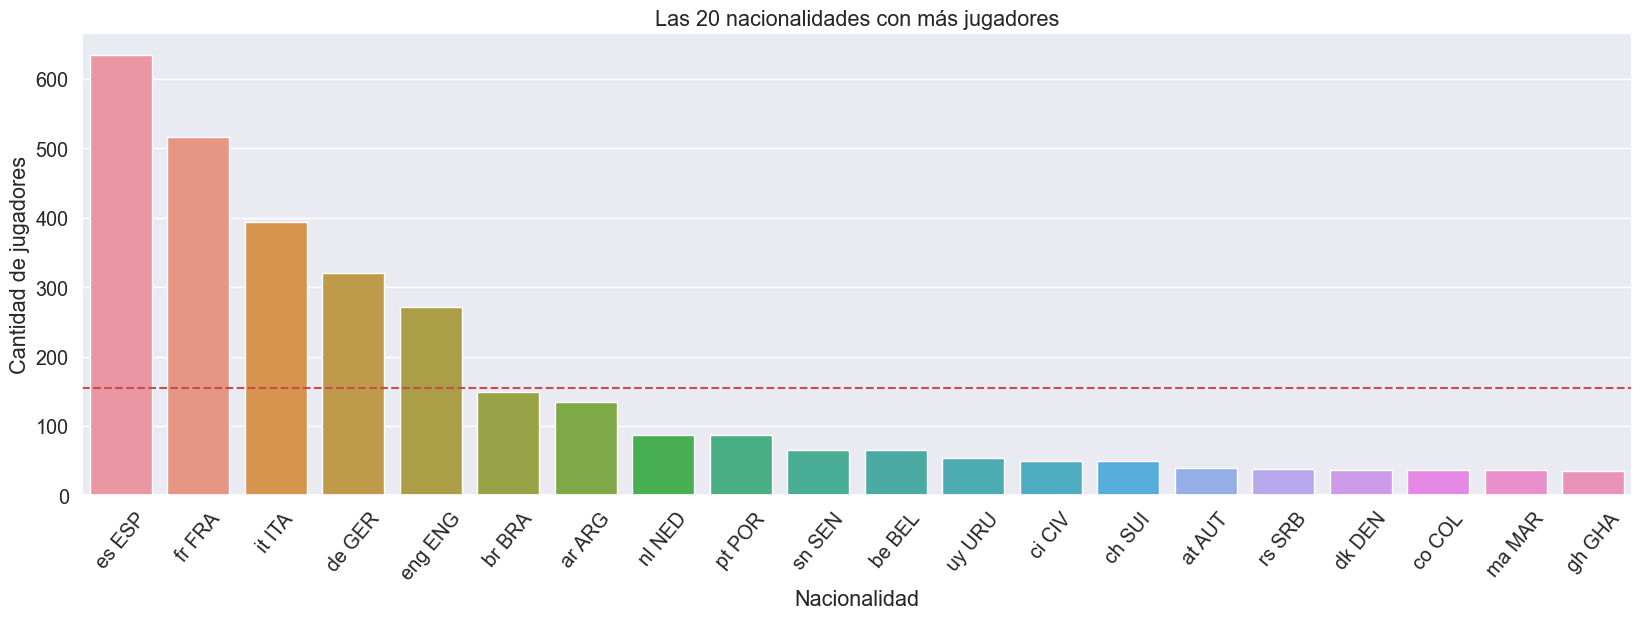

In [159]:
df_count_nationality = df_unique.groupby('nationality').count()['player'].sort_values(ascending=False)[:20]
df_count_nationality = df_count_nationality.reset_index()
df_count_nationality

sns.barplot(data=df_count_nationality, x="nationality", y="player")
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de jugadores')
plt.title('Las 20 nacionalidades con más jugadores')
plt.xticks(rotation=50)

mean = df_count_nationality['player'].mean()
plt.axhline(y=mean, color='r', linestyle='--', label='Mean')

plt.show()

* Los 5 paises con mas jugadores en las ligas europeas son Espana, Francia, Itali, Alemania y Inglaterra (todos europeos). Y estos tiene mas de 250 jugadores cada uno.
* El resto de paises tienen menos de 150 jugadores cada uno.

# Este comportamientos se replica en todas las distintas ligas europeas individualmente?

In [160]:
df['league'].unique()

array(['La Liga', 'Bundesliga', 'Serie A', 'Premier League', 'Ligue 1'],
      dtype=object)

In [161]:
leagues = ['La Liga', 'Bundesliga', 'Serie A', 'Premier League', 'Ligue 1']

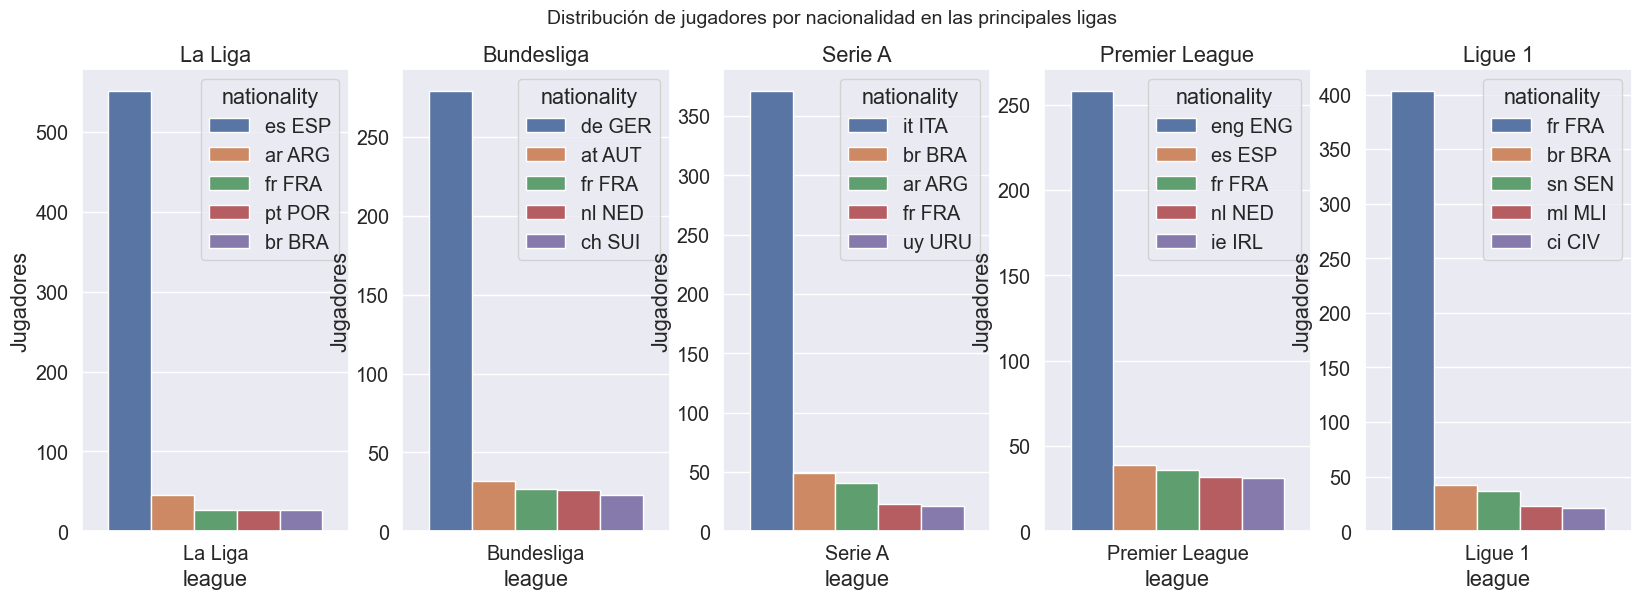

In [162]:
df_count_league_nationality = df_unique.groupby(['league', 'nationality']).count()['player'].reset_index()

fig, ax = plt.subplots(ncols=5)

for indice, league in enumerate(leagues):
    aux = df_count_league_nationality[df_count_league_nationality['league'] == league].sort_values(by='player', ascending=False)[:5]
    sns.barplot(data=aux, x='league', y='player', hue='nationality', ax=ax[indice])
    ax[indice].set_title(league)
    ax[indice].set_ylabel('Jugadores')
    
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

plt.show()

* De acuerdo a la nacionalidad de la liga, es común que la mayoría de los jugadores de esa liga tengan la misma nacionalidad que el país donde se encuentra dicha liga. Es decir, es común encontrar una alta proporción de jugadores con la nacionalidad del país donde está ubicada la liga.

# Cual es la proporcion de jugadores con la misma nacionalidad de la liga vs los extranjeros por cada una de las ligas europeas?

In [163]:
nationalities = ['es ESP', 'de GER', 'it ITA', 'eng ENG', 'fr FRA']

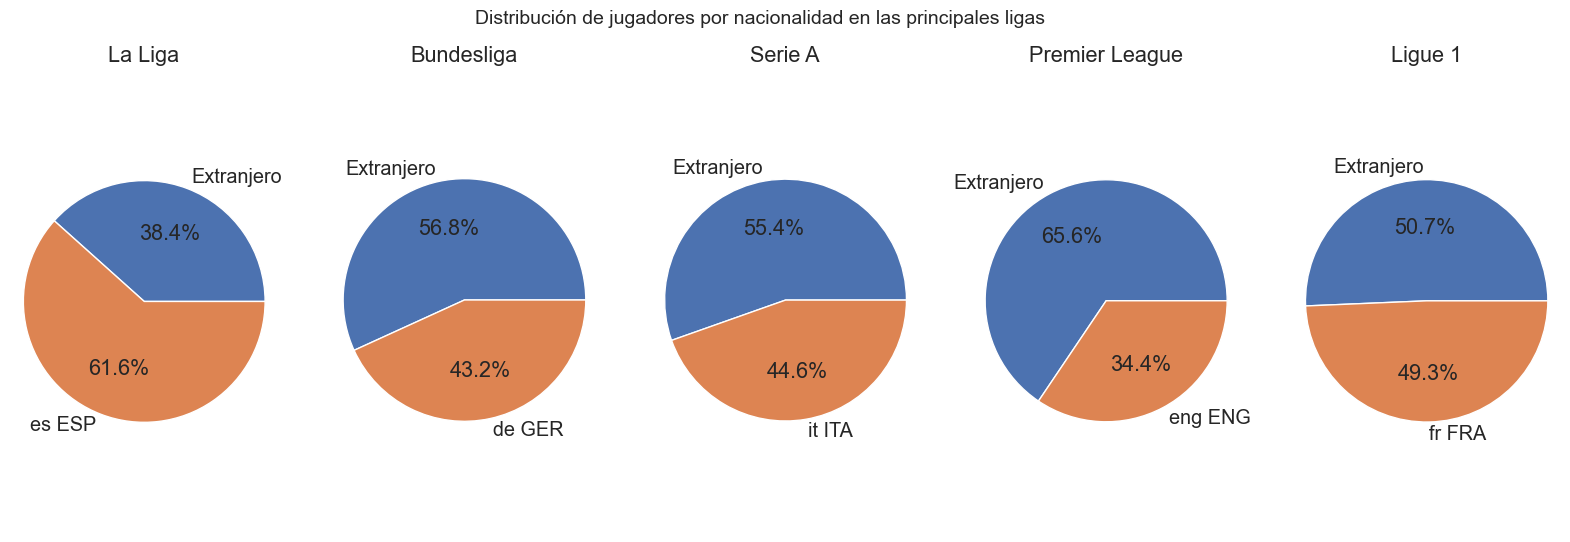

In [164]:
fig, ax = plt.subplots(ncols=5)
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

for indice, league in enumerate(leagues):
    df_count_league_nationality
    aux = df_count_league_nationality.copy()
    aux = aux[aux['league'] == league]
    aux.loc[aux['nationality'] != nationalities[indice], 'nationality'] = 'Extranjero'
    datos_por_nacionalidad = aux.groupby('nationality').sum()['player']
    
    ax[indice].pie(datos_por_nacionalidad, labels=datos_por_nacionalidad.index, autopct='%1.1f%%')
    ax[indice].axis('equal')
    ax[indice].set_title(league)

plt.show()

* En los graficos se ve que la unica liga que tiene mas nativos que extranjeros, es la liga espanola. Esto puede estar dado por:
  * Los jugadores espanoles son mejores que los extranjeros.
  * Son mas baratos y rinden bien.
  * Razones culturales.
  * Porque La Liga pone restricciones a la cantidad de jugadores extranjeros (no europeos) que pueden tener un equipo en la plantilla. Este maximo es de 3 por equipo, a estos cupos se los denomina "extracomunitarios", y cualquier jugador que no tenga tenga la nacionalidad de un pais europeo, debera utilizar unos de estos cupas para poder jugar.
    * Aclaracion: Las 5 grandes ligas de europa tienen restricciones similares a las de la liga espanola, a excepcion de La Premier League. Y puede ser una de las razones por la cual es la liga inglesa es la que cuenta con un mayor porcentaje de jugadores extranjeros (que pueden ser europeos o no).

# Cual es la proporcion de jugadores europeos en cada una de las grandes ligas europeas?

Primero se crea una columna que nos diga el continente al que pertenece cada jugador

In [165]:
EUROPA = 'Europe'
AFRICA = 'Africa'
AMERICA_DEL_SUR = 'South America'
OCEANIA = 'Oceania'
ASIA = 'Asia'
AMERICA_CENTRAL = 'Central America'
AMERICA_DEL_NORTE = 'North America'

continentes = {
    'es ESP': EUROPA,
    'fr FRA': EUROPA,
    'se SWE': EUROPA,
    'rs SRB': EUROPA,
    'de GER': EUROPA,
    'sn SEN': AFRICA,
    'py PAR': AMERICA_DEL_SUR,
    've VEN': AMERICA_DEL_SUR,
    'br BRA': AMERICA_DEL_SUR,
    'tg TOG': AFRICA,
    'nc NCL': OCEANIA,
    'ma MAR': AFRICA,
    'cd COD': AFRICA,
    'co COL': AMERICA_DEL_SUR,
    'ci CIV': AFRICA,
    'it ITA': EUROPA,
    'be BEL': EUROPA,
    'la LAO': ASIA,
    'gn GUI': AFRICA,
    'cg CGO': AFRICA,
    'at AUT': EUROPA,
    'nl NED': EUROPA,
    'cm CMR': AFRICA,
    'ga GAB': AFRICA,
    'eng ENG': EUROPA,
    'eg EGY': AFRICA,
    'ng NGA': AFRICA,
    'dk DEN': EUROPA,
    'am ARM': ASIA,
    'wal WAL': EUROPA,
    'cl CHI': AMERICA_DEL_SUR,
    'ch SUI': EUROPA,
    'gm GAM': AFRICA,
    'al ALB': EUROPA,
    'ar ARG': AMERICA_DEL_SUR,
    'uy URU': AMERICA_DEL_SUR,
    'si SVN': EUROPA,
    'gh GHA': AFRICA,
    'pt POR': EUROPA,
    'pl POL': EUROPA,
    'cf CTA': AFRICA,
    'ml MLI': AFRICA,
    'hr CRO': EUROPA,
    'ro ROU': EUROPA,
    'gr GRE': EUROPA,
    'dz ALG': AFRICA,
    'cr CRC': AMERICA_CENTRAL,
    'hu HUN': EUROPA,
    'gw GNB': AFRICA,
    'sco SCO': EUROPA,
    'no NOR': EUROPA,
    'il ISR': ASIA,
    'au AUS': OCEANIA,
    'ie IRL': EUROPA,
    'bm BER': AMERICA_DEL_NORTE,
    'nz NZL': OCEANIA,
    'nir NIR': EUROPA,
    'sk SVK': EUROPA,
    'tr TUR': ASIA,
    'cz CZE': EUROPA,
    'bg BUL': EUROPA,
    'tn TUN': AFRICA,
    'jp JPN': ASIA,
    'us USA': AMERICA_DEL_NORTE,
    'ua UKR': EUROPA,
    'mx MEX': AMERICA_DEL_NORTE,
    'cw CUW': AMERICA_CENTRAL,
    'ao ANG': AFRICA,
    'pe PER': AMERICA_DEL_SUR,
    'mk MKD': EUROPA,
    'ec ECU': AMERICA_DEL_SUR,
    'gq EQG': AFRICA,
    'ke KEN': AFRICA,
    'mq MTQ': AMERICA_DEL_NORTE,
    'xk KVX': EUROPA,
    'bj BEN': AFRICA,
    'ru RUS': EUROPA,
    'bf BFA': AFRICA,
    'mz MOZ': AFRICA,
    'ee EST': EUROPA,
    'mr MTN': AFRICA,
    'sa KSA': ASIA,
    'jm JAM': AMERICA_DEL_NORTE,
    'fi FIN': EUROPA,
    'za RSA': AFRICA,
    'ba BIH': EUROPA,
    'ca CAN': AMERICA_DEL_NORTE,
    'lu LUX': EUROPA,
    'td CHA': AFRICA,
    'ly LBY': AFRICA,
    'gf GUF': AMERICA_DEL_SUR,
    'cv CPV': AFRICA,
    'li LIE': EUROPA,
    'bi BDI': AFRICA,
    'is ISL': EUROPA,
    'mg MAD': AFRICA,
    'ir IRN': ASIA,
    'ph PHI': ASIA,
    'me MNE': EUROPA,
    'ge GEO': ASIA,
    'cy CYP': EUROPA,
    'ne NIG': AFRICA,
    're REU': AFRICA,
    'tt TRI': AMERICA_DEL_SUR,
    'pa PAN': AMERICA_CENTRAL,
    'zw ZIM': AFRICA,
    'tz TAN': AFRICA,
    'kr KOR': ASIA,
    'md MDA': EUROPA,
    'cn CHN': ASIA,
    'lt LTU': EUROPA,
    'zm ZAM': AFRICA,
    'cu CUB': AMERICA_DEL_NORTE,
    'do DOM': AMERICA_DEL_NORTE,
    'bo BOL': AMERICA_DEL_SUR
}

df['continent'] = df['nationality'].map(continentes)

df['continent'].unique()

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia',
       'Central America', 'North America', nan], dtype=object)

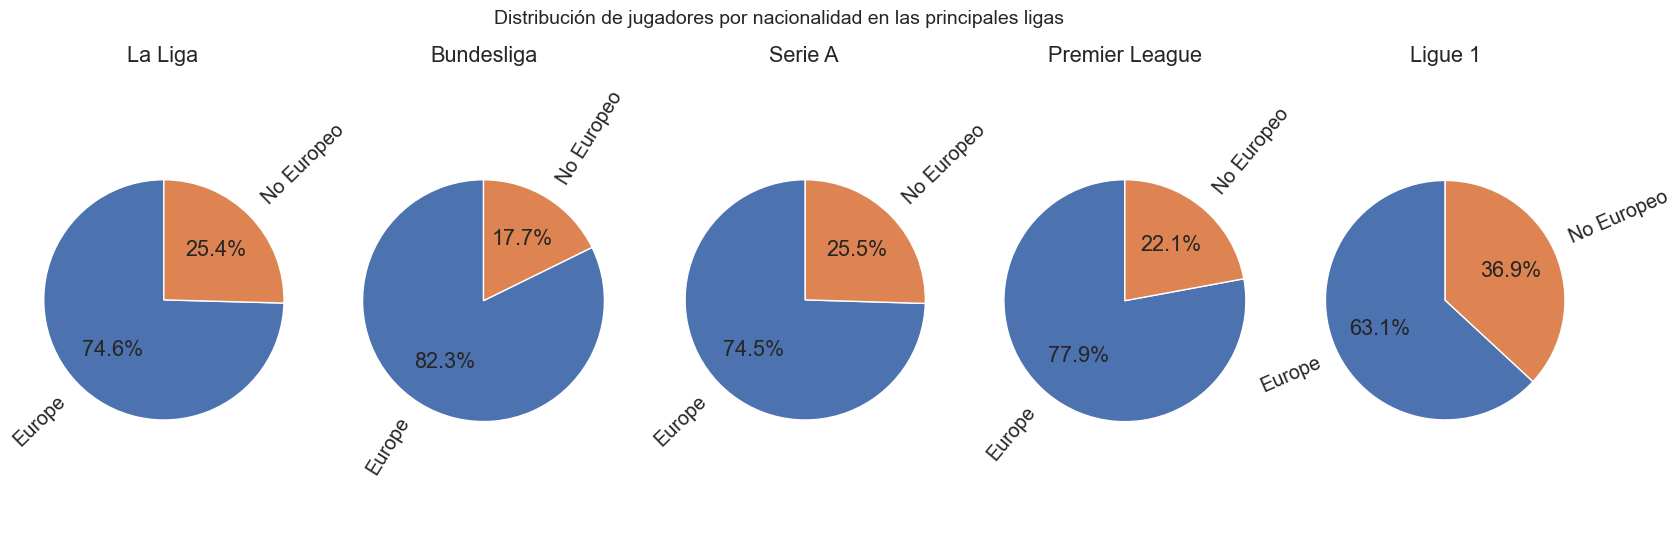

In [189]:
df_count_league_continent = df.groupby(['league', 'continent']).count()['player'].reset_index()
df_count_league_continent.loc[df_count_league_continent['continent'] != EUROPA, 'continent'] = 'No Europeo'
df_count_league_continent = df_count_league_continent.groupby(['league', 'continent']).sum().reset_index()

fig, ax = plt.subplots(ncols=5)
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

for indice, league in enumerate(leagues):
    datos_por_continente = df_count_league_continent[df_count_league_continent['league'] == league]
    ax[indice].pie(datos_por_continente['player'], labels=datos_por_continente['continent'], autopct='%1.1f%%', rotatelabels=90, startangle=90)
    ax[indice].axis('equal')
    ax[indice].set_title(league)

plt.show()

* La Premier League si bien no tiene restricciones para jugar con jugadores no europeos y siendo la liga con mas jugadores extranjeros, es el segundo con mas jugadores europeos despues de la liga Alemana. Esto genera la hipotesis de que las restricciones de jugadores no europeos no afecta a la eleccion de jugadores en los equipos ingleses, y quizas, seleccionan jugadores europeos porques:
  * Son mejores
  * Mas baratos
  * O por caracteristicas culturales del pais o especificas del futbol ingles
  * U otras...
* Un dato a destacar sobre la liga inglesa es que el la liga mas copetitiva de europa y ademas la que mas dinero recauda temporada tras temporada (en la temporada 2021-2022 se generaron mas de 6.2 mil millones de dolares, mientras que la segunda fue la liga espanola con 3.5 mil millones de dolares).
* La liga espanola si bien tiene las restricciones mas duras sobre los jugadores no europeos es el cuarto con mas jugadores europeos (no esta entre los primeros). Lo cual hace parecer ilogico lo de las restricciones, ya que cuando no hay restricciones (liga ingles) la mayoria de los jugadores son europeos y cuando hay restriccines (liga espanola) no es el que mas jugadores europeos tiene.
  * Es destacable que los porcentajes de las dos ligas mas importantes de europa tengan casi la misma proporcion de no europeos (25.4 y 22.1).
  * Pareceria ser que las restriccines a los jugadores no europeos no afecta al alrmado de los equipos ingleses ni espanoles o por lo menos no parece que haya una relacion fuerte entre las restricciones y la seleccion de los jugadores en estas dos ligas.